# 『ガウス過程と機械学習』3章の図に関する実装

## 図3.1の実装
基底関数を動径基底関数
$$
\phi_h (x) = \exp{\{-\frac{(x-\mu_h)^2}{\sigma^2}\}}\ , \ (h = -H , \frac{1}{H} - H , ... , - \frac{1}{H}+H , H)
$$

としたときの回帰問題をサンプルとして提示します．


In [176]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [177]:
plt.style.available # スタイル確認

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [178]:
x = np.arange(-4 , 5 , 0.1 )
x

array([-4.00000000e+00, -3.90000000e+00, -3.80000000e+00, -3.70000000e+00,
       -3.60000000e+00, -3.50000000e+00, -3.40000000e+00, -3.30000000e+00,
       -3.20000000e+00, -3.10000000e+00, -3.00000000e+00, -2.90000000e+00,
       -2.80000000e+00, -2.70000000e+00, -2.60000000e+00, -2.50000000e+00,
       -2.40000000e+00, -2.30000000e+00, -2.20000000e+00, -2.10000000e+00,
       -2.00000000e+00, -1.90000000e+00, -1.80000000e+00, -1.70000000e+00,
       -1.60000000e+00, -1.50000000e+00, -1.40000000e+00, -1.30000000e+00,
       -1.20000000e+00, -1.10000000e+00, -1.00000000e+00, -9.00000000e-01,
       -8.00000000e-01, -7.00000000e-01, -6.00000000e-01, -5.00000000e-01,
       -4.00000000e-01, -3.00000000e-01, -2.00000000e-01, -1.00000000e-01,
        3.55271368e-15,  1.00000000e-01,  2.00000000e-01,  3.00000000e-01,
        4.00000000e-01,  5.00000000e-01,  6.00000000e-01,  7.00000000e-01,
        8.00000000e-01,  9.00000000e-01,  1.00000000e+00,  1.10000000e+00,
        1.20000000e+00,  

In [179]:
mu = np.arange(-3 , 5 , 1 )
mu

array([-3, -2, -1,  0,  1,  2,  3,  4])

In [180]:
sigma = 1

In [181]:
omega = np.array([-0.48 , -0.64 , 0.41 , 0.28 , 0.57 , 0.50 , -0.26 , 0.60])
omega

array([-0.48, -0.64,  0.41,  0.28,  0.57,  0.5 , -0.26,  0.6 ])

In [182]:
def radial_basis_function(x , mu_h , sigma):
    phi = np.exp(- (x - mu_h / sigma)**2)
    return phi

In [183]:
def radial_basis_function_vecteor(x , mu , sigma):# xとmuは同じ次元のベクトル
    phi_vector = []
    length = len(mu)
    # ベクトルの各要素に対して基底関数を計算
    for i in range(length) :
        phi_vector.append(radial_basis_function(x , mu[i] , sigma))
    return phi_vector

In [184]:
def regression_function(x , omega , mu , sigma):
    phi_vector = radial_basis_function_vecteor(x , mu , sigma)
    y = np.dot(omega , phi_vector)
    return y
x1 = np.arange(-2, 2, 0.05) # x1点として[-2, 2]まで0.05刻みでサンプル
x2 = np.arange(-2, 2, 0.05)  # x2点として[-2, 2]まで0.05刻みでサンプル
x1, x2 = np.meshgrid(x1, x2)  # 上述のサンプリング点(x1,x2)を使ったメッシュ生成


In [185]:
phi_vector = radial_basis_function_vecteor(x , mu , sigma)
phi_vector

[array([3.67879441e-01, 4.44858066e-01, 5.27292424e-01, 6.12626394e-01,
        6.97676326e-01, 7.78800783e-01, 8.52143789e-01, 9.13931185e-01,
        9.60789439e-01, 9.90049834e-01, 1.00000000e+00, 9.90049834e-01,
        9.60789439e-01, 9.13931185e-01, 8.52143789e-01, 7.78800783e-01,
        6.97676326e-01, 6.12626394e-01, 5.27292424e-01, 4.44858066e-01,
        3.67879441e-01, 2.98197279e-01, 2.36927759e-01, 1.84519524e-01,
        1.40858421e-01, 1.05399225e-01, 7.73047404e-02, 5.55762126e-02,
        3.91638951e-02, 2.70518469e-02, 1.83156389e-02, 1.21551783e-02,
        7.90705405e-03, 5.04176026e-03, 3.15111160e-03, 1.93045414e-03,
        1.15922917e-03, 6.82328053e-04, 3.93669041e-04, 2.22629857e-04,
        1.23409804e-04, 6.70548243e-05, 3.57128496e-05, 1.86437423e-05,
        9.54016287e-06, 4.78511739e-06, 2.35257520e-06, 1.13372714e-06,
        5.35534780e-07, 2.47959602e-07, 1.12535175e-07, 5.00621802e-08,
        2.18295780e-08, 9.33028757e-09, 3.90893843e-09, 1.605228

In [186]:
y = regression_function(x , omega , mu , sigma)
y

array([-0.18825351, -0.23075371, -0.2780037 , -0.32934937, -0.38388373,
       -0.44048705, -0.49788378, -0.55470712, -0.60956079, -0.66106775,
       -0.70789881, -0.74877935, -0.78247835, -0.80778992, -0.823521  ,
       -0.82849994, -0.82161696, -0.8019013 , -0.76863088, -0.72146118,
       -0.66055278, -0.58667324, -0.50125012, -0.40635768, -0.30462951,
       -0.19910127, -0.09299891,  0.0105029 ,  0.10852249,  0.19868359,
        0.27927348,  0.34933075,  0.40865651,  0.45775395,  0.49770911,
        0.53003196,  0.55647847,  0.57887343,  0.59895016,  0.61821835,
        0.63786641,  0.65870062,  0.68112036,  0.70512649,  0.73035881,
        0.75615713,  0.78163888,  0.80578527,  0.82752632,  0.84581585,
        0.85968832,  0.86829346,  0.87090858,  0.86693421,  0.85588263,
        0.83737152,  0.81113398,  0.77705299,  0.73522137,  0.68602147,
        0.63021091,  0.56899629,  0.50407445,  0.43762392,  0.37223441,
        0.31077177,  0.25618508,  0.21127276,  0.17843148,  0.15

Text(0.5, 1.0, 'fig3.1')

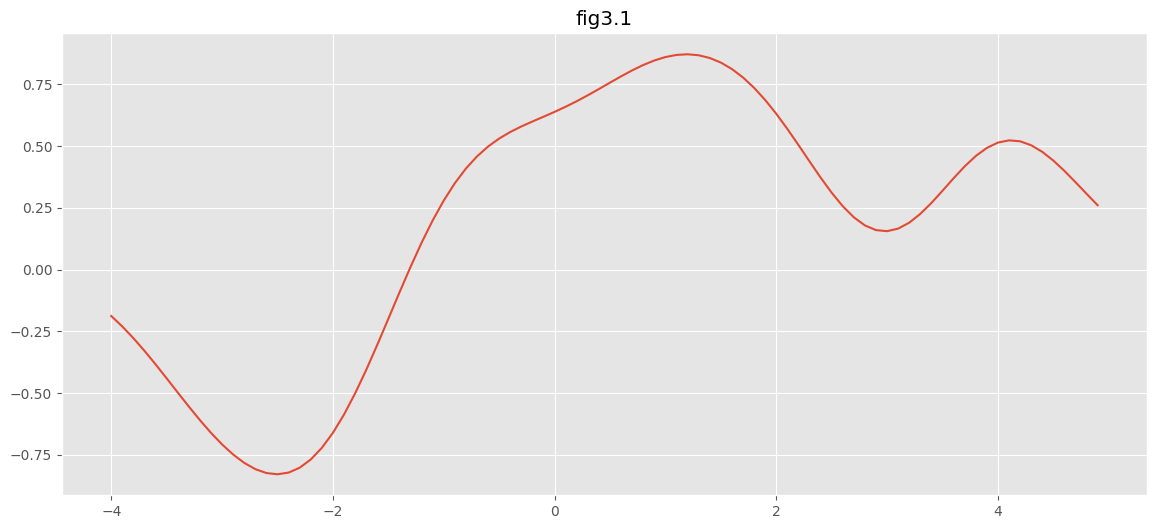

In [187]:
fig , ax = plt.subplots(figsize=(14, 6))

ax.plot(x , y , label = "regression_function")
ax.set_title("fig3.1")

## 図3.4の実装
ガウス過程の概念図を実装します．

ただし，今回カーネルは以下のように定義します．
$$
k(x , x^{'}) = \theta_1 \exp{\left( - \frac{(x - x^{'})^2}{\theta_2} \right)} + \theta_3 \delta(x , x^{'})
$$

In [188]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [189]:
Theta_1 , Theta_2 , Theta_3 = 10 , 1 , 0.1

In [190]:
# カーネル関数を定義
def kernel(x, x_prime, p, q, r):
    if x == x_prime:
        delta = 1
    else:
        delta = 0
    
    kernel =  p*np.exp(-1 * (x - x_prime)**2 / q) + (r * delta) 
    return kernel

In [191]:
# カーネル計算を実行する関数
def compute_kernel(X , Theta_1 , Theta_2 , Theta_3):
    inputdata_length = len(X)
    K = np.zeros((inputdata_length, inputdata_length)) # 2次元配列
    for x in range(inputdata_length):
        for x_prime in range(inputdata_length):
            K[x, x_prime] = kernel(X[x], X[x_prime], Theta_1, Theta_2, Theta_3)
    return K# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [192]:
kai = np.arange(-4 , 5 , 0.1 )

In [193]:
K = compute_kernel(kai , Theta_1 , Theta_2 , Theta_3)

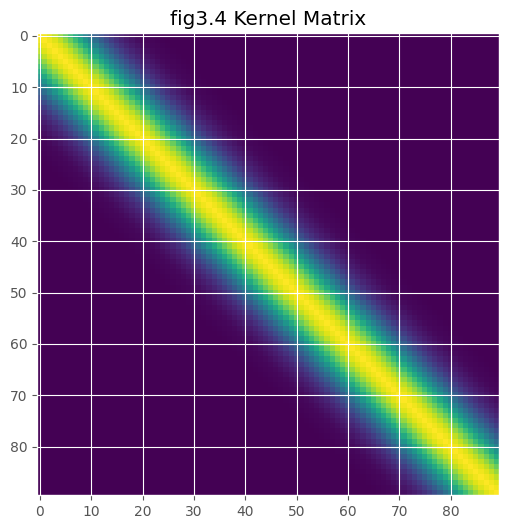

In [194]:
fig, ax = plt.subplots(figsize=(6, 6) )
im = ax.imshow(K)
ax.set_title("fig3.4 Kernel Matrix")
plt.show()

# 図3.11の実装

先程定義したカーネルに対して図3.11のようなサンプルを生成します．

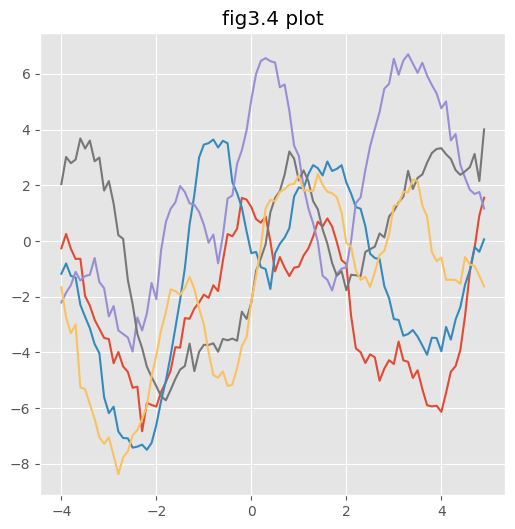

In [195]:
mu = 0 * kai
y = np.random.multivariate_normal(mu, K , 5)

fig, ax = plt.subplots(figsize=(6, 6) )
ax.plot(kai, y.T)
ax.set_title("fig3.4 plot")
plt.show()

### 線形カーネル（清水）
$$
k(x , x^{'}) = \theta_1 x x^{'}
$$

In [196]:
# カーネル関数を定義
def kernel(x, x_prime, p):
    return p * np.dot(x, x_prime)

In [197]:
# カーネル計算を実行する関数
def compute_kernel(X , Theta_1):
    inputdata_length = len(X)
    K = np.zeros((inputdata_length, inputdata_length)) # 2次元配列
    for x in range(inputdata_length):
        for x_prime in range(inputdata_length):
            K[x, x_prime] = kernel(X[x], X[x_prime], Theta_1)
    return K

In [198]:
kai = np.arange(-4 , 5 , 0.1 )

In [199]:
K = compute_kernel(kai , Theta_1)

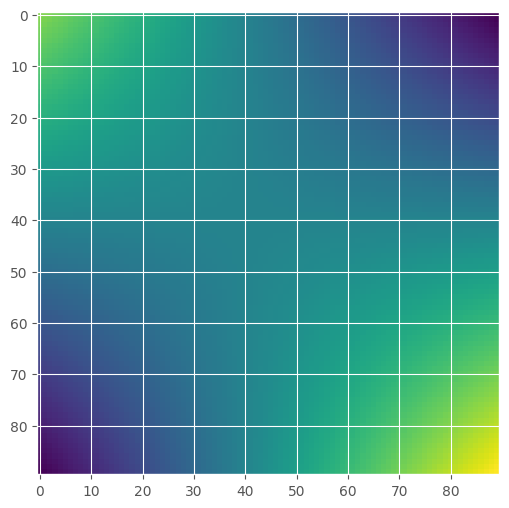

In [200]:
fig, ax = plt.subplots(figsize=(6, 6) )
im = ax.imshow(K)
plt.show()

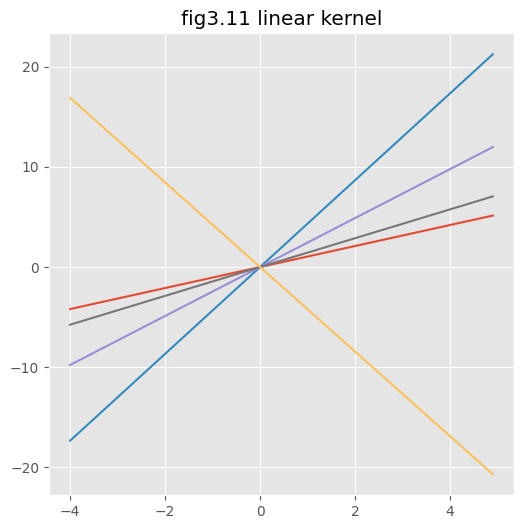

In [201]:
mu = 0 * kai
y = np.random.multivariate_normal(mu, K , 5)

fig, ax = plt.subplots(figsize=(6, 6) )
ax.plot(kai, y.T)
ax.set_title("fig3.11 linear kernel")
plt.show()

### ガウスカーネル
$$
k(x , x^{'}) = \theta_1 \exp{\left( - \frac{(x - x^{'})^2}{\theta_2} \right)}
$$

In [202]:
# カーネル関数を定義
def kernel(x, x_prime, p , q):
    return p * np.exp(-1 * (x - x_prime)**2 / q)

In [203]:
# カーネル計算を実行する関数
def compute_kernel(X , Theta_1 , Theta_2):
    inputdata_length = len(X)
    K = np.zeros((inputdata_length, inputdata_length)) # 2次元配列
    for x in range(inputdata_length):
        for x_prime in range(inputdata_length):
            K[x, x_prime] = kernel(X[x], X[x_prime], Theta_1 , Theta_2)
    return K

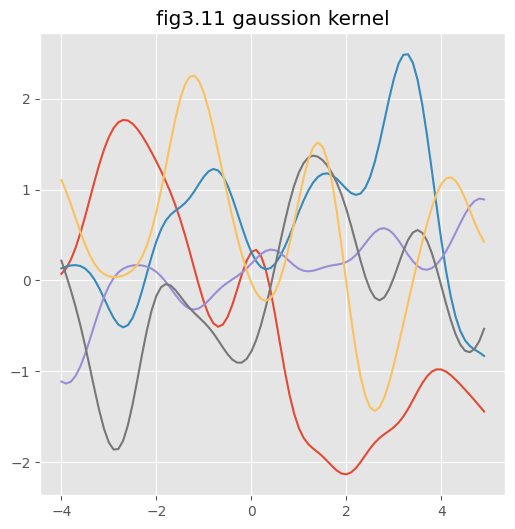

In [204]:
mu = 0 * kai
K = compute_kernel(kai , 1 , 1)
y = np.random.multivariate_normal(mu, K , 5)

fig, ax = plt.subplots(figsize=(6, 6) )
ax.plot(kai, y.T)
ax.set_title("fig3.11 gaussion kernel")
plt.show()

### ビショップ(6.63)
$$
k(x , x^{'}) = \theta_1 \exp{\left( - \frac{(x - x^{'})^2}{2 \theta_2} \right)} + \theta_3 + \theta_4 x x^{'}
$$

In [205]:
# カーネル関数を定義
def kernel(x, x_prime, p , q , r , s):
    return p * np.exp(-1 * (x - x_prime)**2 / q) + r + s * x * x_prime

In [206]:
# カーネル計算を実行する関数
def compute_kernel(X , Theta_1 , Theta_2 , Theta_3 , Theta_4):
    inputdata_length = len(X)
    K = np.zeros((inputdata_length, inputdata_length)) # 2次元配列
    for x in range(inputdata_length):
        for x_prime in range(inputdata_length):
            K[x, x_prime] = kernel(X[x], X[x_prime], Theta_1 , Theta_2 , Theta_3 , Theta_4)
    return K

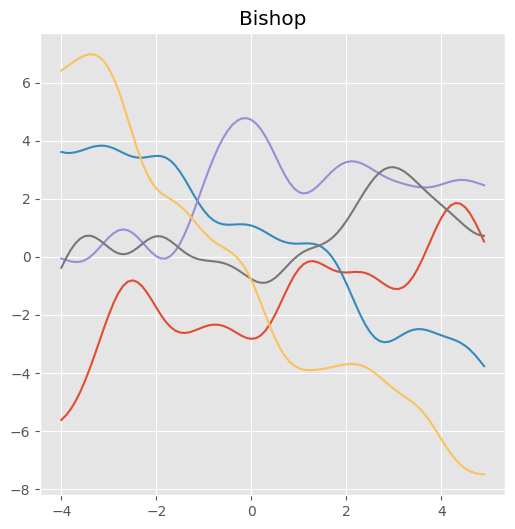

In [207]:
mu = 0 * kai
K = compute_kernel(kai , 1 , 1 , 1 , 1)
y = np.random.multivariate_normal(mu, K , 5)

fig, ax = plt.subplots(figsize=(6, 6) )
ax.plot(kai, y.T)
ax.set_title("Bishop")
plt.show()

### 指数カーネル（川本）
$$
k(x , x^{'}) = \exp{\left( - \frac{|x - x^{'}|}{\theta} \right)}
$$

これはOUノイズに対応するもの．

#### ReMark:OUノイズ
OUノイズは，調和振動子ポテンシャルに従うブラウン運動である．

チャップマン・コロモゴロフ方程式(ガーディナー3.8.4節)
$$
\frac{\partial p(x , t)}{\partial t} =  \frac{\partial (k x p(x , t))}{\partial x} +\frac{D}{2} \frac{\partial^2 p(x , t)}{\partial x^2}
$$

確率微分方程式(ガーディナー4.5.4節)
$$
dx = -kx\ dt+ \sqrt{D}\ dW(t)
$$

積分方程式(ガーディナー4.5.4節)
$$
x(t) = x(0) \exp{\{-kt\}} + \sqrt{D} \int_0^t \exp{\{-k(t-s)\}} dW(s)
$$

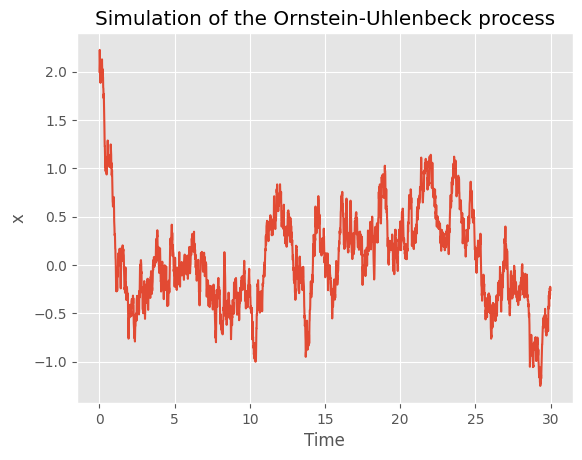

In [208]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータの設定
k = 1.0  # ボルツマン定数 k
D = 0.5  # 熱浴の温度定数 D
dt = 0.01  # 時間刻み幅
T = 30.0  # シミュレーション時間
N = int(T / dt)  # シミュレーションのステップ数

# 初期条件
x0 = 2.0  # 初期値 x(0)
t = np.zeros(N)  # 時間の配列
x = np.zeros(N)  # xの値の配列
x[0] = x0

# シミュレーション
for i in range(N-1):
    dW = np.random.normal(0, np.sqrt(dt))  # Wiener過程の増分
    x[i+1] = x[i] - k * x[i] * dt + np.sqrt(D) * dW
    t[i+1] = t[i] + dt

# グラフのプロット
plt.plot(t, x)
plt.xlabel('Time')
plt.ylabel('x')
plt.title('Simulation of the Ornstein-Uhlenbeck process')
plt.grid(True)
plt.show()


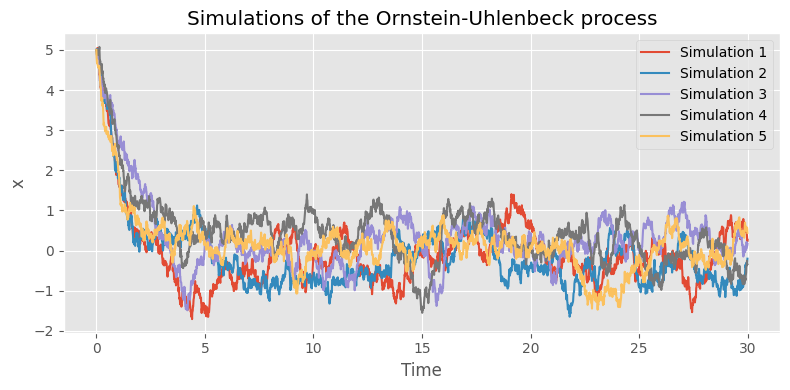

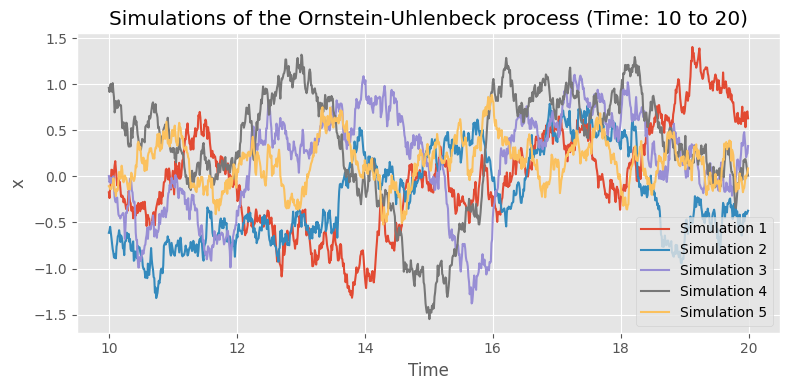

In [209]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータの設定
k = 1.0  # 定数 k
D = 0.5  # ノイズの強度 D
dt = 0.01  # 時間刻み幅
T = 30.0  # シミュレーション時間
N = int(T / dt)  # シミュレーションのステップ数

# 初期条件
x0 = 5.0  # 初期値 x(0)
t = np.zeros(N)  # 時間の配列

# シミュレーションの繰り返し
num_simulations = 5  # シミュレーション回数
simulations = np.zeros((num_simulations, N))  # シミュレーション結果の配列

for i in range(num_simulations):
    x = np.zeros(N)  # xの値の配列
    x[0] = x0
    
    for j in range(N-1):
        dW = np.random.normal(0, np.sqrt(dt))  # Wiener過程の増分
        x[j+1] = x[j] - k * x[j] * dt + np.sqrt(D) * dW
        t[j+1] = t[j] + dt
    
    simulations[i] = x

# 元の0から観測時間までのプロット
plt.figure(figsize=(8, 4))
for i in range(num_simulations):
    plt.plot(t, simulations[i], label=f'Simulation {i+1}')
plt.xlabel('Time')
plt.ylabel('x')
plt.title('Simulations of the Ornstein-Uhlenbeck process')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 時間範囲の指定
t_start = 10.0
t_end = 20.0
start_index = int(t_start / dt)
end_index = int(t_end / dt)

# 時間指定したプロット
plt.figure(figsize=(8, 4))
for i in range(num_simulations):
    plt.plot(t[start_index:end_index], simulations[i, start_index:end_index], label=f'Simulation {i+1}')
plt.xlabel('Time')
plt.ylabel('x')
plt.title('Simulations of the Ornstein-Uhlenbeck process (Time: 10 to 20)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


理論的な期待値
$$
E[x(t)] = x_0 \exp{\{-kt\}}
$$

理論的な分散
$$
Var[x(t)] = \frac{D}{2k} (1 - \exp{\{-2kt\}})
$$

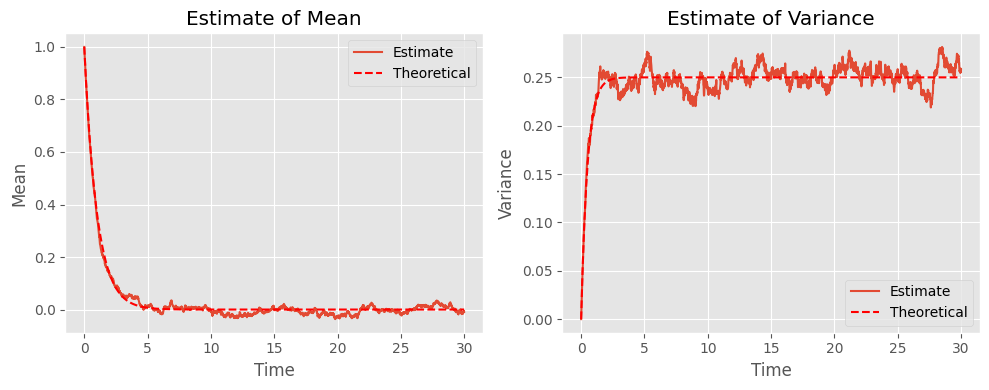

In [210]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータの設定
k = 1.0  # ボルツマン定数 k
D = 0.5  # 熱浴の温度定数 D
dt = 0.01  # 時間刻み幅
T = 30.0  # シミュレーション時間
N = int(T / dt)  # シミュレーションのステップ数

# 初期条件
x0 = 1.0  # 初期値 x(0)
t = np.zeros(N)  # 時間の配列

# シミュレーションの繰り返し
num_simulations = 1000  # シミュレーション回数
simulations = np.zeros((num_simulations, N))  # シミュレーション結果の配列

for i in range(num_simulations):
    x = np.zeros(N)  # xの値の配列
    x[0] = x0
    
    for j in range(N-1):
        dW = np.random.normal(0, np.sqrt(dt))  # Wiener過程の増分
        x[j+1] = x[j] - k * x[j] * dt + np.sqrt(D) * dW
        t[j+1] = t[j] + dt
    
    simulations[i] = x

# 期待値と分散の推定値の計算
mean_estimates = np.mean(simulations, axis=0)
variance_estimates = np.var(simulations, axis=0)

# 理論的な期待値と分散の計算
x_theoretical = x0 * np.exp(-k * t)
mean_theoretical = x0 * np.exp(-k * t)
variance_theoretical = (D / (2 * k)) * (1 - np.exp(-2 * k * t))

# グラフのプロット
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(t, mean_estimates, label='Estimate')
plt.plot(t, mean_theoretical, 'r--', label='Theoretical')
plt.xlabel('Time')
plt.ylabel('Mean')
plt.title('Estimate of Mean')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t, variance_estimates, label='Estimate')
plt.plot(t, variance_theoretical, 'r--', label='Theoretical')
plt.xlabel('Time')
plt.ylabel('Variance')
plt.title('Estimate of Variance')
plt.legend()

plt.tight_layout()
plt.show()

#### OUノイズの定常状態
OUノイズの定常分布は，以下のようになる．
$$
p_s(x) = \sqrt{ \frac{k}{\pi D} } \exp{\left( - \frac{ k x^2}{D} \right)}
$$

また，定常自己相関関数は以下のようになる．
$$
C(\tau) = \frac{D}{2k} \exp{\{-k|\tau|\}}
$$

この自己相関関数が，指数カーネルと一致します．

Remark:指数カーネル
$$
k(x , x^{'}) = \exp{\left( - \frac{|x - x^{'}|}{\theta} \right)}
$$

話は指数カーネルに戻ります．

In [211]:
# カーネル関数を定義
def kernel(x, x_prime, p):
    return np.exp(-1 * np.abs(x - x_prime) / p)

In [212]:
# カーネル計算を実行する関数
def compute_kernel(X , Theta_1):
    inputdata_length = len(X)
    K = np.zeros((inputdata_length, inputdata_length)) # 2次元配列
    for x in range(inputdata_length):
        for x_prime in range(inputdata_length):
            K[x, x_prime] = kernel(X[x], X[x_prime], Theta_1)
    return K

In [213]:
kai = np.arange(0 , 10 , 0.01 )

In [214]:
K = compute_kernel(kai , 1)

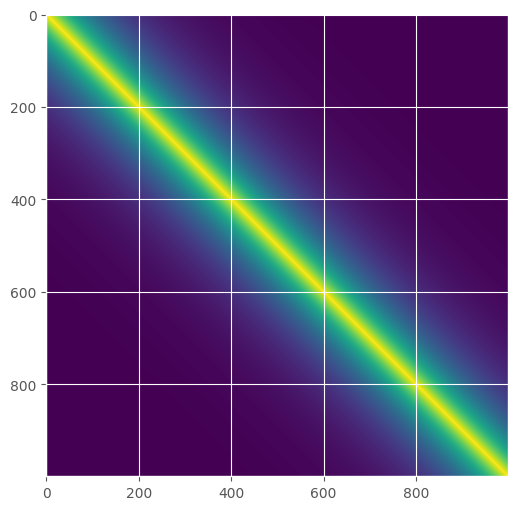

In [215]:
fig, ax = plt.subplots(figsize=(6, 6) )
im = ax.imshow(K)
plt.show()

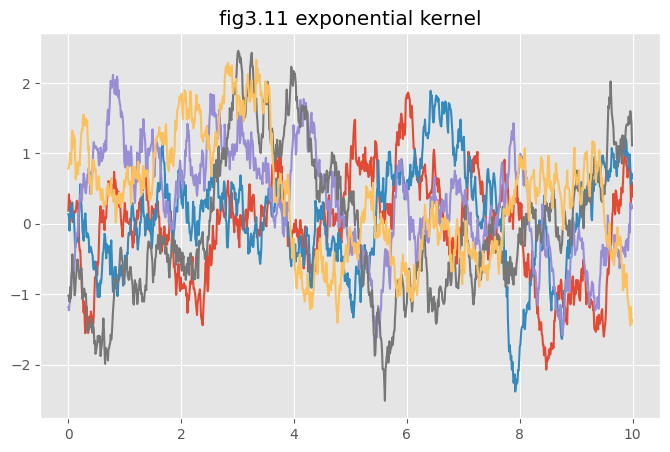

In [216]:
mu = 0 * kai
y = np.random.multivariate_normal(mu, K , 5)

fig, ax = plt.subplots(figsize=(8, 5) )
ax.plot(kai, y.T)
ax.set_title("fig3.11 exponential kernel")
plt.show()

### 周期カーネル（原，高森）
$$
k(x , x^{'}) = \exp{\left( \theta_1 \cos(|x-x^{\prime}| / \theta_2)\right)}
$$

In [217]:
# カーネル関数を定義
def kernel(x, x_prime, p):
    return np.exp(p * np.cos(x - x_prime) / p)

In [218]:
# カーネル計算を実行する関数
def compute_kernel(X , Theta_1):
    inputdata_length = len(X)
    K = np.zeros((inputdata_length, inputdata_length)) # 2次元配列
    for x in range(inputdata_length):
        for x_prime in range(inputdata_length):
            K[x, x_prime] = kernel(X[x], X[x_prime], Theta_1)
    return K

In [219]:
kai = np.arange(-20 , 20 , 0.1 )

In [220]:
K = compute_kernel(kai , Theta_1)

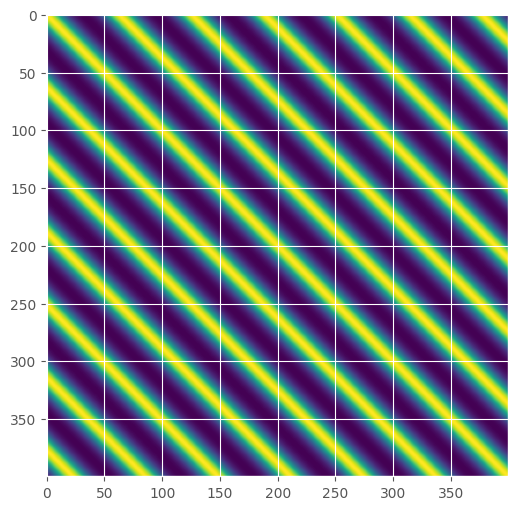

In [221]:
fig, ax = plt.subplots(figsize=(6, 6) )
im = ax.imshow(K)
plt.show()

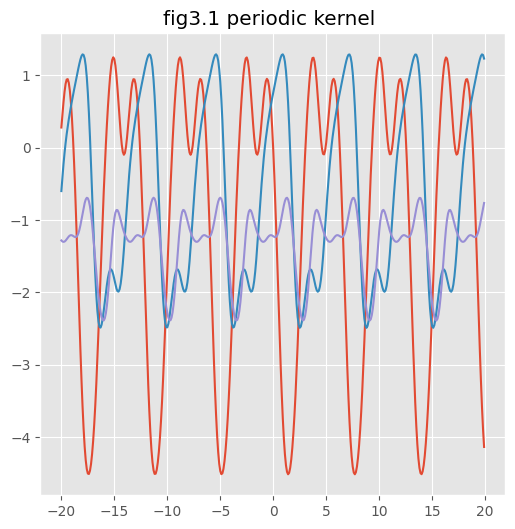

In [222]:
mu = 0 * kai
y = np.random.multivariate_normal(mu, K , 3)

fig, ax = plt.subplots(figsize=(6, 6) )
ax.plot(kai, y.T)
ax.set_title("fig3.1 periodic kernel ")
plt.show()

## 図3.16の実装
ガウス過程回帰の予測結果に関する図の再現

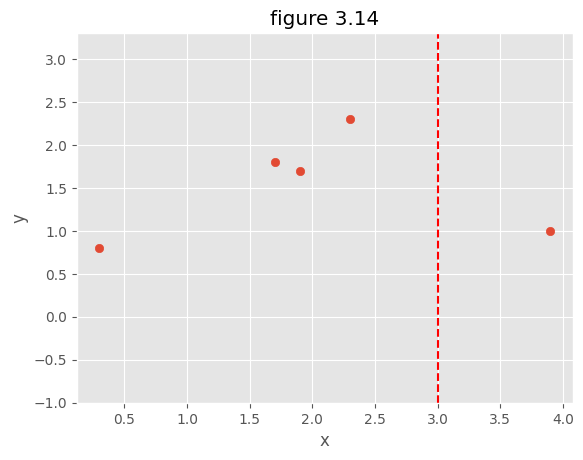

In [223]:
x = np.array([1.7 , 3.9, 1.9 , 0.3 , 2.3])
y = np.array([1.8 , 1.0 , 1.7 , 0.8 , 2.3])

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-1, max(max(y), abs(min(y))) + 1)
plt.axvline(x=3.0, linestyle='dashed', color='red')
plt.title('figure 3.14')
plt.show()

教科書P84の公式3.8より$\vec{y}^{*}$の予測分布は
$$
p(y^{*} | \vec{x}^{*} ,\mathcal{D}) = \mathcal{N} (\textbf{k}^{\top}_* K^{-1} \vec{y} , \textbf{k}_{**} - \textbf{k}^{\top}_* K^{-1} \textbf{k}_*)
$$
ただし，グラム行列$K$は
$$
K^{(train) } = 
\begin{pmatrix}
k(x_1 , x_1) & k(x_1,x_2) & k(x_1,x_3) & ・・・ & k(x_1,x_{N_{train}}) \\
k(x_2,x_1)  & k(x_2,x_2) & k(x_2,x_3) & ・・・ & k(x_2,x_{N_{train}})  \\
k(x_3,x_1)  & k(x_3,x_2) & k(x_3,x_3) & ・・・ & k(x_3,x_{N_{train}}) \\
・& ・& ・& ・・・ & ・\\
・& ・& ・& ・・・ & ・\\
・& ・& ・& ・・・ & ・\\
k(x_{N_{train} }, x_1) & k(x_{N_{train}} , x_2) & k(x_{N_{train}} , x_3) & ・・・ & k(x_{N_{train}} , x_{N_{train}}) \\
\end{pmatrix}
$$

また，$\textbf{k}_*$は，以下のようなベクトルになります．
$$
\textbf{k}_* = (k(x^*,x_1) , k(x^*,x_2) , k(x^*,x_3) ,.... ,k(x^*,x_{N_{train}}))\top
$$

図3.16の予測では，以下のカーネルでやっています．
$$
k(x , x^{'}) = \theta_1 \exp{\left( - \frac{(x - x^{'})^2}{\theta_2} \right)} + \theta_3 \delta(x , x^{'})
$$

In [224]:
# カーネル関数を定義
def kernel(x, x_prime, p, q, r):
    if x == x_prime:
        delta = 1
    else:
        delta = 0
    
    kernel =  p*np.exp(-1 * (x - x_prime)**2 / q) + (r * delta) 
    return kernel

In [225]:
# グラム行列の計算
def compute_kernel(X , Theta_1 , Theta_2 , Theta_3):
    inputdata_length = len(X)
    K = np.zeros((inputdata_length, inputdata_length)) # 2次元配列
    for x in range(inputdata_length):
        for x_prime in range(inputdata_length):
            K[x, x_prime] = kernel(X[x], X[x_prime], Theta_1, Theta_2, Theta_3)
    return K

In [226]:
# パラメータ値
Theta_1 = 1
Theta_2 = 5
Theta_3 = 0.01


# カーネル計算
K = compute_kernel(x , Theta_1 , Theta_2 , Theta_3)

In [227]:
# K^{-1} * y を計算する関数
def Expected_train(K , y):
    yy = np.dot(np.linalg.inv(K), y) # np.linalg.invは逆行列
    return yy

In [228]:
x_asterisk  = np.arange(0 , 5 , 0.2 ) 

In [229]:
# 予測分布の期待値，分散の計算
def predict(X_train , X_test , y , Theta_1 , Theta_2 , Theta_3) :
    # 平均
    mu = []
    # 分散
    var = []

    train_length = len(X_train)
    test_length = len(X_test)
    for x_test in range(test_length):

    # テストデータとトレーニングデータ間のカーネル行列の下地を準備
        k = np.zeros(train_length)
        for x in range(train_length):
            
            # 訓練データとテストデータのカーネル
            k[x] = kernel(X_train[x], X_test[x_test], Theta_1, Theta_2, Theta_3) # (3.68)式
            
            #テストデータ同士のカーネル
        s = kernel(X_test[x_test], X_test[x_test], Theta_1, Theta_2, Theta_3) # (3.69)式

    # K^{-1} * y を計算
        yy = Expected_train(K , y)

    # 内積はドットで計算して, 平均値の配列に追加
        mu.append(np.dot(k, yy)) # (3.74)式の期待値
    
    # 先に『k * K^-1』の部分を(内積なのでドットで)計算
        kK_ = np.dot(k, np.linalg.inv(K)) 
    
    # 後半部分との内積をドットで計算して, 分散の配列に追加
        var.append(s - np.dot(kK_, k.T)) # (3.74)式の分散
    
    return mu , var

In [230]:
mu , var = predict(x , x_asterisk , y , Theta_1 , Theta_2 , Theta_3) 
mu , var

([0.7046053270372088,
  0.7542475844886152,
  0.8214709767421837,
  0.9101540368775769,
  1.0224255579682069,
  1.1579799074265207,
  1.3136012172490616,
  1.4829978877499634,
  1.6570142035453834,
  1.824235843884562,
  1.9719479730506855,
  2.0873479802583894,
  2.15886987396285,
  2.177452408591524,
  2.137583525742155,
  2.0379804323235895,
  1.881813641930723,
  1.6764465239181963,
  1.4327287640602773,
  1.1639416031209482,
  0.8845353915631335,
  0.6088198349233833,
  0.34976255901047626,
  0.11802488798132682,
  -0.07867888982968196],
 [0.03457424089148098,
  0.022053214424963885,
  0.019135657653211235,
  0.021011538911674288,
  0.023740355583843797,
  0.024892992281999593,
  0.023680100755142375,
  0.020633885749876346,
  0.017037774291721597,
  0.01432402329778415,
  0.013595200758400261,
  0.015328311482053047,
  0.01925263635635699,
  0.02438281221832661,
  0.029216980169553985,
  0.032125436532428275,
  0.03191699926999425,
  0.02847979396542455,
  0.02329859998488093,
  

In [231]:
# 予測分布の描画
import numpy as np
import matplotlib.pyplot as plt

# ガウス過程回帰の結果をプロットする関数
def Gaussian_result(X_train, y_train, X_test, mu, var):
    # 分散を標準偏差に変換
    std = np.sqrt(var)

    plt.figure(figsize=(10, 5))
    plt.title('fig 3.16', fontsize=20)
 
    # 元の信号
    plt.plot(X_train, y_train, 'x', color='green', label='Correct signal')
    
    # ガウス過程で求めた平均値を信号化
    plt.plot(X_test, mu, color='blue', label='Mean by Gaussian process')

    plt.axvline(x=3.0, linestyle='dashed', color='red')

    # ガウス過程で求めた標準偏差を範囲化 alphaは透明度
    plt.fill_between(X_test, mu - 2 * std, mu + 2 * std, alpha=0.2, color='blue', label='Standard deviation by Gaussian process')

    plt.legend(fontsize=12)
    plt.show()


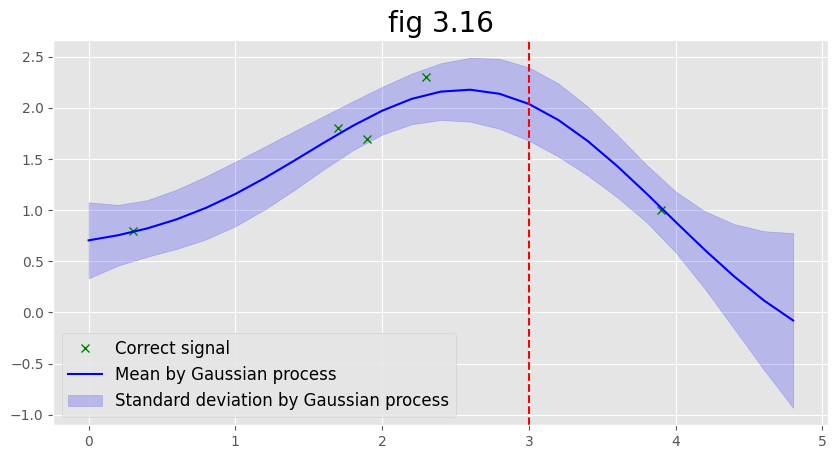

In [232]:
Gaussian_result(x , y , x_asterisk  , mu , var )

## 図3.20の実装
ハイパーパラメータの最適化をするとガウス過程回帰の結果がどの様に変わるのかを確認します．

### 勾配上昇法の復習
大きくしたい関数$L$に対して以下の更新式で最適なパラメータを求めるのでした
$$
更新式\ \ ;\ \ \vec{w}^{(\tau)} = \vec{w}^{(\tau - 1)} + \alpha \nabla_{\vec{w}} L
$$
ということで尤度関数の勾配を求めましょう．

尤度関数に対する勾配は以下のように書けます（3.95）式
$$
\frac{\partial L(\tau^{l-1},\sigma^{l-1},\eta^{l-1})}{\partial \theta^{l-1}}  = - \operatorname{tr}\left\{ K^{-1}_{\theta^{(l-1) }} \frac{\partial K_{\theta^{(l-1)}}}{\partial \theta^{(l-1)}}\right\} + (K^{-1}_{\theta^{(l-1)}} \vec{y})^{\top} \frac{\partial K_{\theta^{(l-1)}}}{\partial \theta^{(l-1)}} K^{-1}_{\theta^{(l-1)}} \vec{y}
$$

でかけます．

よって
$$
 \frac{\partial K_{\theta^{(l-1)}}}{\partial \theta^{(l-1)}} = \ ?\  
$$

をカーネルから計算できれば更新式が導かれます

カーネル関数
$$
k(x , x^{'}) = \theta_1 \exp{\left( - \frac{(x - x^{'})^2}{\theta_2} \right)} + \theta_3 \delta(x , x^{'})
$$


に対する偏微分は
$$
\frac{\partial K_{(n,n^{'})}}{\partial \tau} =  K_{(n,n^{'})} - e^{\eta} \delta{(x , x^{'})}
$$ 
$$
\frac{\partial K_{(n,n^{'})}}{\partial \sigma} =  \left(K_{(n,n^{'})} - e^{\eta} \delta{(n,n^{'})} \right) e^{-\sigma}(x_n - x_{n^{'}})^2
$$ 
$$
\frac{\partial K_{(n,n^{'})}}{\partial \eta} =  e^{\eta} \delta{(x , x^{'})}
$$ 

用いることにより算出できます．

$l$を更新回数，$\alpha$を学習率として
$$
\frac{\partial K_{\theta^{(l-1)}}}{\partial \tau^{(l-1)}}=
K^{(l-1)} - \exp{(\eta^{(l-1)})} I
$$
$$
\frac{\partial K_{\theta^{(l-1)}}}{\partial \sigma^{(l-1)}}=
\left(K^{(l-1)} - \exp{(\eta^{(l-1)})} I \right) \exp{(-\sigma^{(l-1)})} Dis
$$
$$
\frac{\partial K_{\theta^{(l-1)}}}{\partial \eta^{(l-1)}}=
\exp{(\eta^{(l-1)})} I
$$

となります．

In [233]:
# tauの偏微分の計算
def Tau_grad(X_old , y_old , K_old , l ,Theta_1 ,Theta_2 , Theta_3):

    # X_train : (N + l - 1) × 1
    # K_old : (N + l - 1) × (N + l - 1)
    # y_old : (N + l - 1) × 1
    
    l = l
    old_length = len(X_old)
    length = old_length + l
    
    
    # パラメータの再定義
    tau , sig , eta = np.log(Theta_1) , np.log(Theta_2) , np.log(Theta_3)
    I = np.eye(length - l)
    yK = Expected_train(K_old , y_old)
    
    tau_grad = - 1 * np.trace( I - Theta_3 * np.linalg.inv(K_old)) + np.dot(yK , y_old) - Theta_3 * np.dot(yK , yK)
    return tau_grad

In [234]:
# sigmaの偏微分の計算
def Distance_matrix(X_train):
    lenght = len(X_train)
    distance_matrix = np.zeros((lenght ,lenght))
    
    for x in range(lenght):
        for x_prime in range(lenght):
            X = X_train[x]
            X_prime = X_train[x_prime]
            distance_matrix[x , x_prime] = ( X - X_prime ) ** 2
    
    return distance_matrix

def New_distance_matrix( X_old ,  X_cross , l , distance_matrix_old ): # l：更新回数
    l = l - 1
    length = len(X_old)
    k = np.zeros(length)
    for x in range(length):
        X = X_old[x]
        X_prime = X_cross[l]
        k[x] = ( X - X_prime ) ** 2
    K_new = np.vstack([distance_matrix_old , k]) # 最後の行に追加
    
    s = 0
    k = np.append(k, s)
    k = k[:,np.newaxis] # (N + l - 1 ) × 1　の行列にする 
    distance_matrix_new = np.hstack([K_new , k]) # 最後の列に追加
    return distance_matrix_new

def Sigma_grad(X_old , y_old , K_old , l ,Theta_1 ,Theta_2 , Theta_3 , distance_matrix_old):
    # パラメータの再定義
    tau , sig , eta = np.log(Theta_1) , np.log(Theta_2) , np.log(Theta_3) 
    mai = 1 / Theta_2
    # 更新回数の確認
    l = l
    old_length = len(X_old)
    length = old_length + l
    
    d = distance_matrix_old
    yK = Expected_train(K_old , y_old)
    K_mai = np.linalg.inv(K_old)
    
    sigma_grad = - np.trace(mai * np.dot(K_mai,d) - Theta_3 * mai * np.dot(K_mai , d)) \
                + mai * np.dot( yK , np.dot( np.dot(K_old , d) , yK ) ) \
                - Theta_3 * mai * np.dot(yK , np.dot(d,yK)) 
    return sigma_grad 

In [235]:
# etaの偏微分の計算
def Eta_grad(X_old , y_old , K_old , l ,Theta_1 ,Theta_2 , Theta_3):
    # パラメータの再定義
    tau , sig , eta = np.log(Theta_1) , np.log(Theta_2) , np.log(Theta_3)
    # 学習回数の確認
    old_length = len(X_old)
    length = old_length + l
    # 計算に必要なベクトルK^{-1} * y
    yK = Expected_train(K_old , y_old)
    
    #　勾配の計算
    eta_grad = - Theta_3 * np.trace(np.linalg.inv(K_old)) + Theta_3 * np.dot(yK , yK)
    
    return eta_grad 

In [236]:
def Parameter_new(X_train , X_cross, y_train , y_cross , K ,Theta_1 ,Theta_2 , Theta_3 , alpha , beta):
    train_lenght = len(X_train)
    cross_lenght = len(X_cross)
    tau_history = np.zeros(cross_lenght)
    sigma_history = np.zeros(cross_lenght)
    eta_history = np.zeros(cross_lenght)
    
    #パラメータの初期値
    tau , sigma , eta = np.log(Theta_1) , np.log(Theta_2) , np.log(Theta_3)
    
    # 最初の引数を訓練データ，学習済みカーネルにする．
    X_old = X_train
    y_old = y_train
    K_old = K
    # sigmaの学習に必要な距離行列を定義しておく
    d = Distance_matrix(X_train)
    
    # 学習
    for l in range(cross_lenght):
        # パラメータの勾配計算
        tau_grad = Tau_grad(X_old , y_old , K_old , l ,Theta_1 ,Theta_2 , Theta_3)
        sigma_grad = Sigma_grad(X_old , y_old , K_old , l ,Theta_1 ,Theta_2 , Theta_3 , d)
        eta_grad = Eta_grad(X_old , y_old , K_old , l ,Theta_1 ,Theta_2 , Theta_3)
        # パラメータの更新
        tau = tau + alpha * tau_grad
        sigma = sigma + beta * sigma_grad
        eta = eta + alpha * eta_grad
        # パラメータの軌跡保存
        Theta_1 = np.exp(tau) 
        Theta_2 = np.exp(sigma) 
        Theta_3 = np.exp(eta) 
        tau_history[l] = Theta_1 
        sigma_history[l] = Theta_2 
        eta_history[l] = Theta_3 
        # X,y,kernel,dの更新
        K_old = compute_kernel(X_old , Theta_1 , Theta_2 , Theta_3)
    
    Theta_1_new = np.exp(tau)
    Theta_2_new = np.exp(sigma)
    Theta_3_new = np.exp(eta)
        
    return tau , tau_history , sigma , sigma_history , eta , eta_history , Theta_1_new , Theta_2_new , Theta_3_new 

In [237]:
Theta_1 , Theta_2 , Theta_3 = 1.596 , 6.560 , 0.082
mu , var = predict(x , x_asterisk , y , Theta_1 , Theta_2 , Theta_3) 